In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
train = pd.read_excel('Train.xlsx')
test = pd.read_excel('Test.xlsx')

In [3]:
X = train.drop(columns = ['Income'])
y = train[['Income']]

#  Unbalancing learning

In [4]:
#
train[['Income']].value_counts()

Income
0         17089
1          5311
dtype: int64

## Split the data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15
                                                    , stratify=y)

In [6]:
# # to run for test
# X_test = test

## Missing Values

In [7]:
import numpy as np
X_train.replace("?", np.nan, inplace=True)

X_train['Employment Sector'].fillna(X_train['Employment Sector'].mode().loc[0], inplace=True)
X_train['Role'].fillna(X_train['Role'].mode().loc[0], inplace=True)
X_train['Base Area'].fillna(X_train['Base Area'].mode().loc[0], inplace=True)

X_train.isna().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

In [8]:
X_test.replace("?", np.nan, inplace=True)

X_test['Employment Sector'].fillna(X_test['Employment Sector'].mode().loc[0], inplace=True)
X_test['Role'].fillna(X_test['Role'].mode().loc[0], inplace=True)
X_test['Base Area'].fillna(X_test['Base Area'].mode().loc[0], inplace=True)

X_test.isna().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

#  Outlier removal 

### Visualization 

In [9]:
#fig = px.box(Xy, y=Xy['Years of Education'], color_discrete_sequence=['dimgrey'], template='plotly_white')
#fig.show()

In [10]:
#hist2 = px.histogram(Xy, x=Xy['Years of Education'], color_discrete_sequence=['darkseagreen'], template='plotly_white')
#hist2.show()

In [11]:
#fig = px.box(Xy, y=Xy['Working Hours per week'], color_discrete_sequence=['dimgrey'], template='plotly_white')
#fig.show()

In [12]:
#hist2 = px.histogram(Xy, x=Xy['Working Hours per week'], color_discrete_sequence=['darkseagreen'], template='plotly_white')
#hist2.show()

In [13]:
#fig = px.box(df, y=df['Money Received'], color_discrete_sequence=['dimgrey'], template='plotly_white')
#fig.show()

In [14]:
#fig = px.box(df, y=df['Ticket Price'], color_discrete_sequence=['dimgrey'], template='plotly_white')
#fig.show()

In [15]:
# filters1 = ((Xy['Working Hours per week'] <=81)           
#             &(Xy['Money Received'] <=27000)
#             &(Xy['Ticket Price']<=3700)
#             &(Xy['Employment Sector']!= 'Unemployed'))

# df_1 = Xy[filters1]

In [16]:
# print('Percentage of data kept after removing outliers:', np.round((df_1.shape[0] / Xy.shape[0]), 4))

## LOF method

In [17]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
metric_features = ["Years of Education","Working Hours per week","Money Received","Ticket Price"]

In [19]:
Xy = pd.concat([X_train, y_train], axis=1)

In [20]:
lof = LocalOutlierFactor(n_neighbors=10,contamination=0.03)
result=lof.fit_predict(Xy[metric_features])

In [21]:
outliers_index= np.where(result==-1)
outliers_index=outliers_index[0]
                              

In [22]:
df_2 = Xy.drop(Xy.index[outliers_index],axis=0)

In [23]:
print('Percentage of data kept after removing outliers:'
      , np.round(df_2.shape[0] /Xy.shape[0], 4))

Percentage of data kept after removing outliers: 0.97


In [24]:
X_train = Xy.iloc[:,:-1]
y_train = Xy.iloc[:,-1]

## Correlations

In [25]:

#checked the correlation between non-categorical variables using the pearson correlation, with the target 

In [26]:
# X_train = Xy.iloc[:,:-1]
# y_train = Xy.iloc[:,-1]checked the correlation between non-categorical variables using the pearson correlation, with the target 

# #cor = df[['Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price','Income']].corr()


# #cor_var

# def cor_heatmap(cor):
#     plt.figure(figsize=(6,5))
#     sns.heatmap(data = cor, annot = True, cmap = 'YlGnBu', fmt = '.1')
#     plt.show
    
# #cor_heatmap(cor)

# wanted to see how the categorical variables related to the dependent variable

# def bar_charts_categorical (df, feature, target):
#     cont_tab = pd.crosstab(df[feature], df[target], margins = True)
#     categories = cont_tab.index[:-1]
    
#     fig = plt.figure(figsize=(40,3))
   
#     plt.subplot(121)
#     p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color = 'gray')
#     p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom = cont_tab.iloc[:-1,0], color='teal')
#     plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
#     plt.title('Frequency Bar Chart')
#     plt.xlabel(feature)
#     plt.ylabel('$Frequency$')
   
#     obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values),
#                       np.divide(cont_tab.iloc[:-1,1].values, cont_tab.iloc[:-1, 2].values)])
    
#     plt.subplot(122)
#     p1 = plt.bar(categories, obs_pct[0], 0.55, color='gray')
#     p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color='teal')
#     plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
#     plt.title('Proportion Bar Chart')
#     plt.xlabel(feature)
#     plt.ylabel('$p$')
   
#     plt.show()

#bar_charts_categorical(df, 'Native Continent', 'Income')

#bar_charts_categorical(df, 'Marital Status', 'Income')

#bar_charts_categorical(df, 'Lives with', 'Income')

#bar_charts_categorical(df, 'Base Area', 'Income')

#bar_charts_categorical(df, 'Education Level', 'Income')

#bar_charts_categorical(df, 'Employment Sector', 'Income')

#bar_charts_categorical(df, 'Role', 'Income')

#g = sns.FacetGrid(df, col='Income')
#g = g.map(sns.distplot, "Ticket Price")
#sns.plt.show()

# Check duplicates

In [27]:
#print(df[df.duplicated()].shape[0], 'duplicated records in the dataset.')

## Incoherence checking 

In [28]:
#X_train.loc[(X_train['Age'] < X_train['Years of Education'])]
#X_test.loc[(X_test['Age'] < X_test['Years of Education'])]

In [29]:
#2. Cannot be single and live with husbans or wife    
#X_train.loc[(X_train['Marital Status'] == 0) & (X_train['Lives with'].isin(['Wife','Husband']))]     
#X_test.loc[(X_test['Marital Status'] == 0) & (X_test['Lives with'].isin(['Wife','Husband']))]

In [30]:
#Role 'army' can only be public sector.                                     
#X_train.loc[X_train['Role'].isin(['Army'])]   
#X_test.loc[X_test['Role'].isin(['Army'])]

In [31]:
#4. if money received is greather than 0 the ticket price has to be equal to 0. Belongs to group B.   
#X_train.loc[(X_train['Money Received'] > 0) & (X_train['Ticket Price']!=0)]   
#X_test.loc[(X_test['Money Received'] > 0) & (X_test['Ticket Price']!=0)]

# Feature engineering

In [32]:
# Gender from name
X_train['Gender'] = X_train.Name.str.split(" ",expand=True, n = 1)[0] 
X_train["Gender"] = X_train["Gender"].map({"Mr.":1, "Mrs.":0,"Miss":0})

# Birthday to age
X_train['Age'] = X_train.Birthday.str.split(',',expand=True,n=1)[1]
X_train['Age'] = 2048 - X_train['Age'].astype('int64')
X_train.drop(columns=['Birthday'], inplace=True)

# Base Area drop
X_train.drop(columns=['Base Area','Name','Education Level'], inplace=True)
X_train.set_index('CITIZEN_ID', inplace = True)


X_train['money_dif']=X_train['Money Received']- X_train['Ticket Price']

X_train.drop(columns=['Money Received', 'Ticket Price'], inplace=True)

# #Aggregated self_employds
X_train['Employment Sector'] = X_train['Employment Sector'].str.split(' - ',expand=True,n=1)[0]

X_train["Employment Sector"]= X_train["Employment Sector"].map({'Private Sector': 'Private','Public Sector': 'Public',
                                           "Self-Employed (Individual)":'Self-Employed',
                                           "Self-Employed (Company)":'Self-Employed', 
                                           "Never Worked": 'Unemployed',
                                           "Unemployed":'Unemployed'})



In [33]:
# Gender from name
X_test['Gender'] = X_test.Name.str.split(" ",expand=True, n = 1)[0] 
X_test["Gender"] = X_test["Gender"].map({"Mr.":1, "Mrs.":0,"Miss":0})

# Birthday to age
X_test['Age'] = X_test.Birthday.str.split(',',expand=True,n=1)[1]
X_test['Age'] = 2048 - X_test['Age'].astype('int64')
X_test.drop(columns=['Birthday'], inplace=True)

# Base Area drop
X_test.drop(columns=['Base Area', 'Name','Education Level'], inplace=True)
X_test.set_index('CITIZEN_ID', inplace = True)


X_test['money_dif']=X_test['Money Received']- X_test['Ticket Price']

X_test.drop(columns=['Money Received', 'Ticket Price'], inplace=True)

# #Aggregated self_employds 
X_test['Employment Sector'] = X_test['Employment Sector'].str.split(' - ',expand=True,n=1)[0]

X_test["Employment Sector"] = X_test["Employment Sector"].map({'Private Sector': 'Private','Public Sector': 'Public',
                                           "Self-Employed (Individual)":'Self-Employed',
                                           "Self-Employed (Company)":'Self-Employed', 
                                           "Never Worked": 'Unemployed',
                                           "Unemployed":'Unemployed'})




In [34]:
X_test.shape

(4480, 10)

In [35]:
# #
# X_train = train.drop(columns = ['Income'])
# y_train = train[['Income']]

# One hot encoding

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
df_ohc = X_train.copy()

In [38]:
features_to_encode = df_ohc.columns[df_ohc.dtypes==object].tolist()  
features_to_encode

['Native Continent',
 'Marital Status',
 'Lives with',
 'Employment Sector',
 'Role']

In [39]:
ohc1 = OneHotEncoder(sparse=False)
ohc_feat1 = ohc1.fit_transform(df_ohc[features_to_encode])
ohc_feat_names1 = ohc1.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat1, index=df_ohc.index, columns=ohc_feat_names1)  
ohc_df

,x0_Africa,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Divorced,x1_Married,x1_Married - Spouse Missing,x1_Married - Spouse in the Army,x1_Separated,...,x4_Household Services,x4_IT,x4_Machine Operators & Inspectors,x4_Management,x4_Other services,x4_Professor,x4_Repair & constructions,x4_Sales,x4_Security,x4_Transports
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
28969,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24903,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30519,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16478,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17033,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train  = pd.concat([X_train,ohc_df],axis = 1)
X_train.drop(columns=features_to_encode, inplace = True)

### for x_test

In [41]:
df_ohc_test = X_test.copy()

In [42]:
ohc_test = OneHotEncoder(sparse=False)
ohc_feat = ohc_test.fit_transform(df_ohc_test[features_to_encode])
ohc_feat_names = ohc_test.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat, index=df_ohc_test.index, columns=ohc_feat_names)  
ohc_df_test

,x0_Africa,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Divorced,x1_Married,x1_Married - Spouse Missing,x1_Married - Spouse in the Army,x1_Separated,...,x4_Household Services,x4_IT,x4_Machine Operators & Inspectors,x4_Management,x4_Other services,x4_Professor,x4_Repair & constructions,x4_Sales,x4_Security,x4_Transports
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
28489,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20073,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20223,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16269,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17730,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20606,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34289,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
X_test  = pd.concat([X_test,ohc_df_test],axis = 1)
X_test.drop(columns=features_to_encode, inplace = True)

## Data Normalization/Standardization

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMax Scaler


In [45]:
# scalertrain = MinMaxScaler()
# scaled_feat_train = scalertrain.fit_transform(X_train)


In [46]:
# scalertest2 = MinMaxScaler()
# scaled_feat_test = scalertest2.fit_transform(X_test)


In [47]:

# X_train = pd.DataFrame(scaled_feat_train, columns = X_train.columns) 
# X_test = pd.DataFrame(scaled_feat_test, columns =X_test.columns) 


In [48]:
# combine = [X_train,X_test]

### StandardScaler

In [49]:
# scalertrain = StandardScaler()
# scaled_feat_train = scalertrain.fit_transform(X_train)

In [50]:
# scalertest2 = StandardScaler()
# scaled_feat_test = scalertest2.fit_transform(X_test)

In [51]:
# X_train = pd.DataFrame(scaled_feat_train, columns = X_train.columns) 
# X_test = pd.DataFrame(scaled_feat_test, columns =X_test.columns) 


In [52]:
# combine = [X_train,X_test]

## Feature selection

In [53]:
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV, LogisticRegression
from sklearn.feature_selection import RFE,mutual_info_classif,GenericUnivariateSelect

### RFE

In [54]:
import matplotlib.pyplot as plt

In [55]:

model = LinearRegression()

In [56]:
rfe = RFE(estimator = model, n_features_to_select = 4)

In [57]:
X_rfe = rfe.fit_transform(X = X_train, y = y_train) 

In [58]:
model.fit(X = X_rfe, y = y_train)

LinearRegression()

In [59]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False,  True, False])

In [60]:
rfe.ranking_

array([35, 36, 34, 37, 38, 32, 30, 31, 33, 29, 16, 13, 14, 12, 17, 18, 15,
       21, 20, 24, 22, 19, 23, 27, 26, 25, 28,  5,  7, 10,  8, 11,  1,  6,
        1,  9,  1,  4,  2,  1,  3])

In [61]:
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features

Years of Education                   False
Working Hours per week               False
Gender                               False
Age                                  False
money_dif                            False
x0_Africa                            False
x0_America                           False
x0_Asia                              False
x0_Europe                            False
x0_Oceania                           False
x1_Divorced                          False
x1_Married                           False
x1_Married - Spouse Missing          False
x1_Married - Spouse in the Army      False
x1_Separated                         False
x1_Single                            False
x1_Widow                             False
x2_Alone                             False
x2_Children                          False
x2_Husband                           False
x2_Other Family                      False
x2_Other relatives                   False
x2_Wife                              False
x3_Private 

### Optimal number of features

In [62]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    # we are going to see in the next class this "train_test_split()"...
    #X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.3, random_state = 0)
    
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    print(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

0.05009889938862022
0.0707827552697684
0.07133983146818701
0.07246727923140739
0.08308521673750202
0.08472128159536718
0.09184589201322058
0.09365409773961408
0.09490487864167996
0.0953957522301121
0.09536928346580642
0.09532008299609784
Optimum number of features: 10
Score with 10 features: 0.095396


## Lasso

In [63]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [64]:
reg = LassoCV()

In [65]:
reg.fit(X=X_train,y=y_train)

LassoCV()

In [66]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.823262


In [67]:
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))

Best score using built-in LassoCV: 0.085588


In [68]:
coef = pd.Series(reg.coef_, index = X_train.columns)
coef

Years of Education                   0.000000
Working Hours per week               0.001410
Gender                               0.000000
Age                                  0.002198
money_dif                            0.000010
x0_Africa                           -0.000000
x0_America                          -0.000000
x0_Asia                              0.000000
x0_Europe                            0.000000
x0_Oceania                          -0.000000
x1_Divorced                         -0.000000
x1_Married                           0.000000
x1_Married - Spouse Missing         -0.000000
x1_Married - Spouse in the Army      0.000000
x1_Separated                        -0.000000
x1_Single                           -0.000000
x1_Widow                            -0.000000
x2_Alone                            -0.000000
x2_Children                         -0.000000
x2_Husband                           0.000000
x2_Other Family                     -0.000000
x2_Other relatives                

In [69]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 38 variables


In [70]:
coef.sort_values()

Years of Education                   0.000000
x2_Wife                              0.000000
x3_Private                          -0.000000
x3_Public                            0.000000
x3_Self-Employed                     0.000000
x3_Unemployed                       -0.000000
x4_Administratives                  -0.000000
x4_Agriculture and Fishing          -0.000000
x4_Army                             -0.000000
x4_Cleaners & Handlers              -0.000000
x4_Household Services               -0.000000
x4_IT                                0.000000
x4_Machine Operators & Inspectors   -0.000000
x4_Management                        0.000000
x4_Other services                   -0.000000
x4_Professor                         0.000000
x4_Repair & constructions           -0.000000
x4_Sales                             0.000000
x2_Other relatives                  -0.000000
x4_Security                          0.000000
x2_Other Family                     -0.000000
x2_Children                       

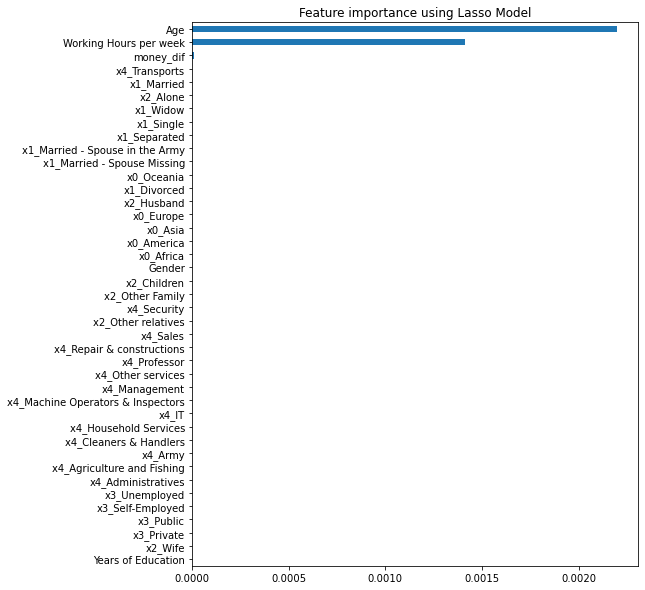

In [71]:
plot_importance(coef, 'Lasso')

## Ridge

In [72]:
ridge = RidgeCV()

In [73]:
ridge.fit(X=X_train,y=y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [74]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 10.000000


In [75]:
print("Best score using built-in LassoCV: %f" %ridge.score(X_train,y_train))

Best score using built-in LassoCV: 0.342751


In [76]:
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
coef_ridge

Years of Education                   0.032512
Working Hours per week               0.002975
Gender                               0.066571
Age                                  0.002803
money_dif                            0.000006
x0_Africa                            0.012974
x0_America                          -0.006516
x0_Asia                             -0.014757
x0_Europe                            0.028006
x0_Oceania                          -0.019708
x1_Divorced                         -0.049478
x1_Married                           0.043726
x1_Married - Spouse Missing         -0.000924
x1_Married - Spouse in the Army      0.109871
x1_Separated                        -0.035040
x1_Single                           -0.049302
x1_Widow                            -0.018853
x2_Alone                            -0.086662
x2_Children                         -0.072050
x2_Husband                           0.213279
x2_Other Family                     -0.088747
x2_Other relatives                

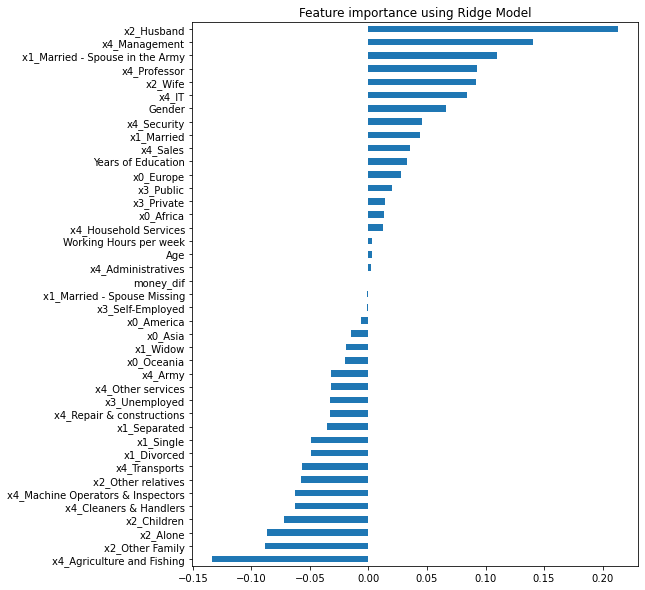

In [77]:
plot_importance(coef_ridge, 'Ridge')

In [78]:
mutual_information = mutual_info_classif(X_train, y_train)

In [79]:
len(X_train.columns)

41

In [80]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.subplots(1, figsize=(60, 1))
# sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
# plt.yticks([], [])
# plt.gca().set_xticklabels(X_train.columns[1:], rotation=45, ha='right', fontsize=12)
# plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
# plt.gcf().subplots_adjust(wspace=0.2)

In [81]:
trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)

In [82]:
kepler_X_trans = trans.fit_transform(X_train, y_train)


## The choice

In [83]:
X_train = X_train[['x1_Married','money_dif','Years of Education','Age','Working Hours per week','x4_Management',
            'x4_Professor','x2_Husband','x4_Agriculture and Fishing','x4_Other services','Gender','x3_Public']]

X_test  = X_test[['x1_Married','money_dif','Years of Education','Age','Working Hours per week','x4_Management',
            'x4_Professor','x2_Husband','x4_Agriculture and Fishing','x4_Other services','Gender','x3_Public']]

## Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import svm

NN = MLPClassifier(random_state = 5)
NN.fit(X_train, y_train)
NN_score = NN.score(X_test,y_test)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test,y_test)

RF = RandomForestClassifier(random_state = 5)
RF.fit(X_train, y_train)
RF_score = RF.score(X_test,y_test)

Dtree = DecisionTreeClassifier(random_state = 5)
Dtree.fit(X_train, y_train)
Dtree_score = Dtree.score(X_test,y_test)

AB=AdaBoostClassifier(random_state = 5)
AB.fit(X_train, y_train)
AB_score = AB.score(X_test,y_test)

SVC = svm.SVC(random_state = 5)
SVC.fit(X_train, y_train)
SVC_score =SVC.score(X_test,y_test)

GB= GradientBoostingClassifier(random_state = 5 )
GB.fit(X_train, y_train)
GB_score = GB.score(X_test,y_test)

results = pd.DataFrame({
    'Model': ['NN','KNN','RF','Dtree', 'AB','SVC','GB'],
    'Score': [NN_score,KNN_score,RF_score,Dtree_score,AB_score,SVC_score,GB_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


,Model
Score,
0.870089,GB
0.862723,AB
0.852009,RF
0.843973,KNN
0.827232,Dtree
0.814063,NN
0.803348,SVC


In [85]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance_GB':np.round(GB.feature_importances_,3),
                            #'importance_NN':np.round(NN.feature_importances_,3),
                            'importance_AB':np.round(AB.feature_importances_,3),
                            #'importance_SVC':np.round(SVC.feature_importances_,3),
                            'importance_RF':np.round(RF.feature_importances_,3),
                            #'importance_KNN':np.round(KNN.feature_importances_,3),
                            'importance_Dtree':np.round(Dtree.feature_importances_,3)})
importances = importances.sort_values('importance_GB',ascending=False).set_index('feature')
importances

,importance_GB,importance_AB,importance_RF,importance_Dtree
feature,,,,
x1_Married,0.371,0.04,0.156,0.228
money_dif,0.279,0.38,0.184,0.198
Years of Education,0.195,0.16,0.141,0.162
Age,0.063,0.18,0.271,0.195
Working Hours per week,0.037,0.08,0.145,0.126
x4_Management,0.018,0.02,0.025,0.016
x4_Professor,0.012,0.02,0.019,0.019
x2_Husband,0.007,0.04,0.011,0.008
x4_Agriculture and Fishing,0.006,0.02,0.007,0.008


In [86]:
 from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=20,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=123,
                      max_features='auto')

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier(random_state = 123,learning_rate=0.25,n_estimators=99) 

# metodos de arvore nao requerem normalizacao e GB é um desses por isso nao normalizamos os dados

In [88]:

GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.25, n_estimators=99,
                           random_state=123)

In [89]:
y_pred = GB.predict(X_test)

In [90]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


In [91]:
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),4)*100} %")

The accuracy of the model is 87.63 %


In [92]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance_GB':np.round(GB.feature_importances_,3)})
importances.sort_values('importance_GB',ascending=False).set_index('feature')

,importance_GB
feature,
x1_Married,0.366
money_dif,0.282
Years of Education,0.186
Age,0.070
Working Hours per week,0.041
x4_Management,0.018
x4_Professor,0.014
x2_Husband,0.006
x4_Agriculture and Fishing,0.006


In [93]:
# resultsDf = pd.DataFrame(y_pred, columns = ['Income'], index = X_test.index)
# resultsDf.to_csv('results.csv')

In [94]:
# resultsDf

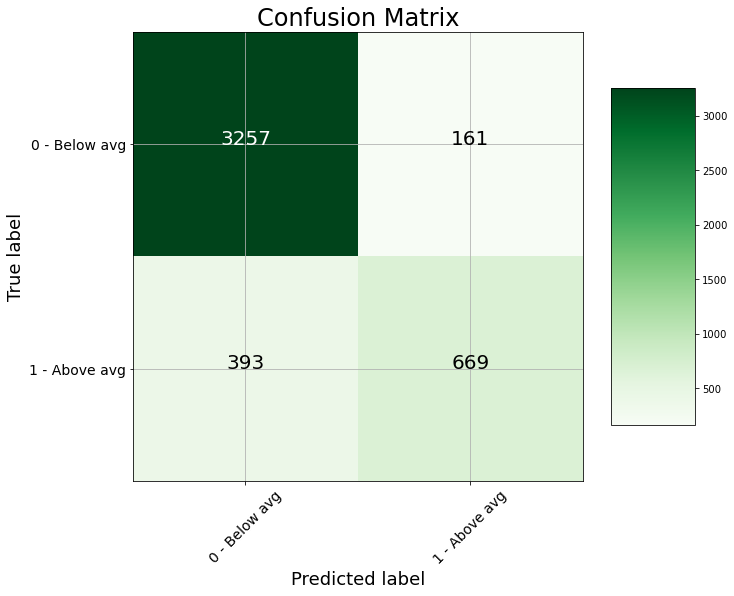

In [95]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):  
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Below avg', '1 - Above avg'],
                      title =  'Confusion Matrix')

In [96]:
from sklearn.metrics import classification_report
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [97]:
labels_train = GB.predict(X_train)
labels_val = GB.predict(X_test)

In [98]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_test, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13671
           1       0.80      0.63      0.70      4249

    accuracy                           0.87     17920
   macro avg       0.84      0.79      0.81     17920
weighted avg       0.87      0.87      0.87     17920

[[12994   677]
 [ 1577  2672]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------